Now let's try a slightly more complicated rotation. Clearly, $\hat{M} = (\hat{X} + \hat{Z})/2$ is a hermitian operator, so we can define a rotation $\exp(-i\alpha\hat{M}/2)$. Figure out what it does.

Hint: one way to approach this exercise is to figure out eigenvectors of $\hat{M}$ and find the matrix exponent this way.

In [1]:
import imageio
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import qutip
from matplotlib import cm
from matplotlib.ticker import FormatStrFormatter, LinearLocator
from tqdm import tqdm

Eigenvalues: [-1.  1.]
Eigenstates: [Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
 Qobj data =
 [[ 0.38268343]
  [-0.92387953]]
 Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
 Qobj data =
 [[-0.92387953]
  [-0.38268343]]                                                       ]


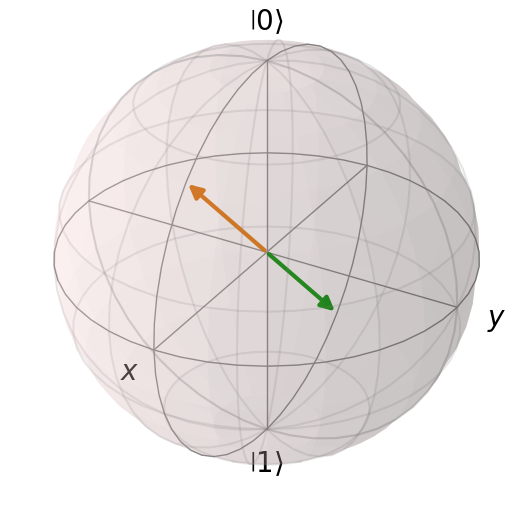

In [2]:
# First, we start with plotting the eigenstates of the operator

M = (qutip.sigmax() + qutip.sigmaz()) / np.sqrt(2)
eigvals, eigstates = M.eigenstates()

print("Eigenvalues:", eigvals)
print("Eigenstates:", eigstates)

b = qutip.Bloch()
b.make_sphere()
b.add_states(eigstates)
b.render()
b.show()

In [3]:
up = qutip.basis(2, 0)  # |0>

bloch_states = []

# generate and store states for alpha
for alpha in np.linspace(0.0, 2 * np.pi, 50):
    rotate_M = (-1j * alpha * M / 2).expm()
    psi = rotate_M * up
    bloch_states.append(psi)

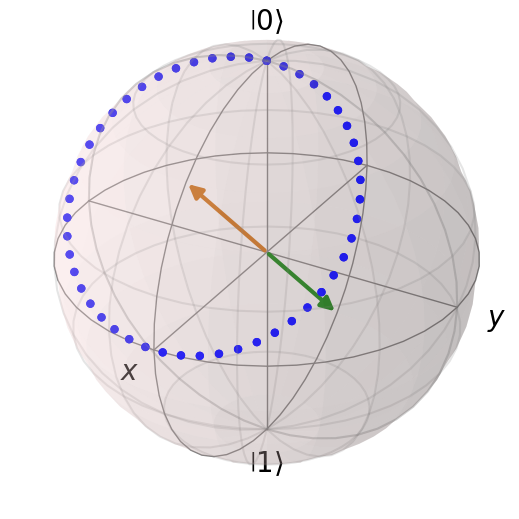

In [10]:
b = qutip.Bloch()
b.point_color = "blue"
b.point_marker = ["o"]
b.point_size = [25]
b.add_states(eigstates)
b.add_states(bloch_states, "point")
b.show()

The animated bloch sphere is can be found [here](https://github.com/Gopal-Dahale/qmnp/tree/main/hw1/p1#exercise-33). The axis lies in the X-Z plane as $\phi = 0$.

Verify $\exp(-i\alpha\hat{M}/2)$ is equal to the calculation done by hand by using the equation below:

\begin{equation}
f(\hat{H}) = \sum_i f(h_i) |h_i\rangle\langle h_i|.
\end{equation}

which gave the eigenvalues $\{+1, -1\}$ and eigenvectors

\begin{align*} 
| H_+ \rangle = cos\left(\frac{\pi}{8} \right) |0 \rangle + sin \left( \frac{\pi}{8} \right) |1\rangle \\
| H_- \rangle = -sin \left( \frac{\pi}{8} \right) |0 \rangle + cos\left(\frac{\pi}{8} \right) |1\rangle
\end{align*}

\begin{equation}
\exp(-i\alpha\hat{M}/2) = \exp(-i\alpha/2)| H_+ \rangle \langle H_+ | + \exp(i\alpha/2)| H_- \rangle \langle H_- |
\end{equation}

In [11]:
c = np.cos(np.pi / 8)
s = np.sin(np.pi / 8)

m1 = np.array([[c**2, s * c], [c * s, s**2]])
m2 = np.array([[s**2, -s * c], [-s * c, c**2]])

for alpha in np.linspace(0.0, 2 * np.pi, 50):
    rotate_M = (-1j * alpha * M / 2).expm()
    U = np.exp(-1j * alpha / 2) * m1 + np.exp(1j * alpha / 2) * m2
    assert np.allclose(rotate_M.full(), U) == True